# Ransac
We will explore color-line estimation by using ransac (Random sample consensus). Ransac uses multiple iteration to estimate the line that fits the data best. For each iteration, a random pair of 2 pixels is used to estimating a line; all other pixels are used to judge this "hypothesis" line. The line that supports the most pixels is considered the color-line. 

## Ransac Algorithm

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import randint
import random
import numpy as np
import cv2
import os
random.seed(2)
np.random.seed(2)


def choice(array, size, replace):
    """ Returns a sample of a certain size for a numpy array. """
    indices = np.random.choice(len(array), size=size, replace=replace)
    sample = array[indices]
    return sample



def ransac(patch, iterations, threshold):
    """Returns the color-line in vector form.

    Iterates over pairs of 2 pixels. Each pixel pair is considered as a
    line hypothesis. A certain number (`iterations`) of hypotheses are
    considered. The line that fits the most pixels is returned in
    vector form.

    Args:
        patch (3D numpy array): A square patch of an image.
        iterations (int): The number of color-lines that are tested.
        threshold (float): The distance threshold between the hypothesis line
        and point, for the line to be considered a good fit.
    Returns:
        point (3D numpy array): A vector representing a point on the color-line.
        direction (3D numpy array): The color-lines direction vector.
        best_support (int): The number of points that support the best color-line.
    """
    best_support = 0
    direction = None
    point = None
    patch = np.reshape(patch, (-1, 3))

    for idx in range(iterations):
        v1, v2 = choice(patch, size=2, replace='False')
        d1 = v2 - v1
        support = 0

        for pixel in patch:
            d2 = pixel - v1
            dist = distance(d1, d2)

            if dist < threshold:
                support += 1

        if support > best_support:
            point = v1
            direction = d1
            best_support = support
    return point, direction, best_support

## Distance Metric

In [2]:
def distance(d1, d2):
    """ Returns the distance metric for two direction vectors.

    The distance metric determines whether a color-line fits
    a pixel. Fattal defines this distance metric as the projection
    of a pixels direction vector onto the plane that is perpendicular
    to the color-lines direction vector.

    Args:
        d1: A color-line direction vector.
        d2: A direction vector.
    Returns:
        dist: The distance metric.
    """
    projection_onto_plane = d2 - projection(d1, d2)
    dist = np.linalg.norm(projection_onto_plane)

    return dist


def projection(v1, v2):
    """ Returns the projection of v2 onto v1.

    Args:
        v1: A vector that is projected onto.
        v2: A vector that is projected.
    Returns:
        result: A vector projection.
    """
    result = (np.dot(v1, v2) / np.dot(v1, v1)) * v1
    return result

# Plotting function

In [3]:
def setup_3d_plot(): 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return fig, ax

def plot_vector(origin, target, plt_axis):
    vlength = np.linalg.norm(target)
    ax.quiver(origin[0], origin[1], origin[2],
              target[0],target[1],target[2],pivot='tail',
              arrow_length_ratio=0.3/vlength)

## Apply Ransac to Image Patch

In [4]:
img = cv2.imread(os.path.join('images', 'plant.jpg'))
img = img / 255
height, width, _ = img.shape

patch_size =  7
patch_y = randint(0, height - patch_size)
patch_x = randint(0, width - patch_size)

patch = img[patch_y:patch_y + patch_size,
            patch_x:patch_x + patch_size, :]

direction, point, _ = ransac(patch,
                             iterations=300,
                             threshold=0.02)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


## Plot Color-line anbd Pixels  

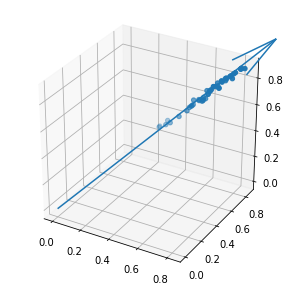

In [5]:
b, g, r = np.split(patch, 3, axis=2)
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.scatter(b, g, r)
origin = np.array([0, 0, 0])
plot_vector(origin, direction*2, ax)
plt.show()